# Equation of motion for the rocket

\begin{align}
\frac{dh}{dt} &= v\\
(m_s+m_p) \frac{dv}{dt}& = -(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D
\end{align}

# Euler's method to solve this problem

In [53]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [54]:
T = 100.0
dt = 0.1 #the timestep
N = int(T/dt)+1
t = numpy.arange(0.0, T + 0.1, 0.1)

$$u_{n+1} = u_n + \Delta t \,f'(u_n).$$
\begin{align}
h_{n+1} & = h_n + \Delta t \, h'_n \\
v_{n+1} & = v_n + \Delta t \, v'_n.
\end{align}
\begin{align}
v'_n & = {dv}/{dt} = (-(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D)/(m_s+m_p)
\end{align}

\begin{align}
u & = \begin{pmatrix} h \\ v \\
\end{pmatrix}
& f(u) & = \begin{pmatrix} v \\ (-(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D)/(m_s+m_p) \end{pmatrix}.
\end{align}

In [55]:
### initial conditions ###
h0 = 0
v0 = 0
h = numpy.zeros(N)
h[0] = h0
v = numpy.zeros(N)
v[0] = v0
u = numpy.array([h0, v0])

In [56]:
mp = numpy.empty(N)
for i in range(0, len(t)):
    if t[i] <= 5:
        m_pdot = 20.0 # Propellant burn rate in kg/s
        mp[i] = m_pdot
    else:
        m_pdot = 0.0
        mp[i] = m_pdot

In [57]:
# model parameters:
m_s = 50.0 #weight of the rocket shell in kg
g = 9.81 #gravity in m s^{-2}
rho = 1.091 #average air density in kg m^{-3}
r = 0.5 #radius of the rocket in m
A = math.pi * r**2 # maximum cross sectional area of the rocket
v_e = 325.0 #exhaust speed in m/s
C_D = 0.15 #drag coefficient
m_p0 = 100.0 #initial weight of the rocket propellent
m_p = m_p0 - t*mp

In [58]:
#time-loop using Euler's method
for n in range(1, N):
    u = u + dt*numpy.array([u[1], (-(m_s + m_p[n])*g + mp[n]*v_e - 0.5*rho*v[n]*abs(v[n])*A*C_D)/(m_s + m_p[n])])
    h[n] = u[0]
    v[n] = u[1]

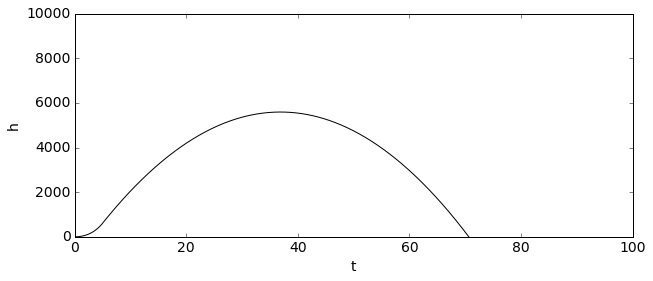

In [59]:
pyplot.figure(figsize=(10,4))   #set plot size
pyplot.ylim(0,10000)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t', fontsize=14) #x label
pyplot.ylabel('h', fontsize=14) #y label
pyplot.plot(t,h, 'k-');

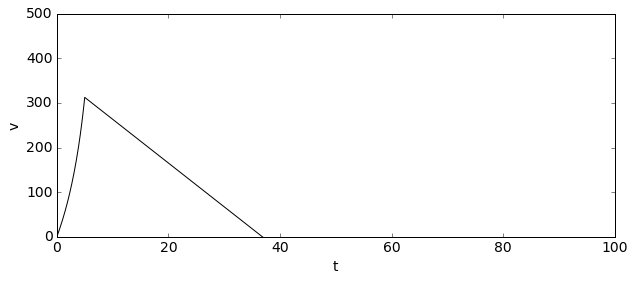

In [60]:
pyplot.figure(figsize=(10,4))   #set plot size
pyplot.ylim(0,500)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t', fontsize=14) #x label
pyplot.ylabel('v', fontsize=14) #y label
pyplot.plot(t,v, 'k-');

In [63]:
max(h)

5590.1750614996345

In [64]:
max(v)

312.37083882651729